In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles
figsettings()

# Spherical Gaussian

In [2]:
name, samples = get_samples('gauss_8')
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]
# samples = samples.iloc[:endpoint_true]

samples['beta_logL'] = get_betas_logL(samples)

In [3]:
Npoints = 25
iterations = make_iterations(endpoint_true, Npoints)
logbetas_term = np.zeros(Npoints)
logbetas_term_half = np.zeros(Npoints)
logbetas_grad = np.zeros(Npoints)
logbetas_post_mean = np.zeros(Npoints)
logbetas_post_std = np.zeros(Npoints)
logbetas_logL = np.log(samples.beta_logL.iloc[iterations])

for i, ndead in enumerate(iterations):
    points = points_at_iteration(samples, ndead)
    logbetas_term[i] = np.log(get_beta_end(points, ndead))
    logbetas_term_half[i] = np.log(get_beta_end(points, ndead, epsilon=0.5))
    logbetas_grad[i] = get_logbeta_grad(points, ndead)
    logbetas_post_mean[i], logbetas_post_std[i] = get_logbeta_post(points, ndead)
    print('\r', f'Iteration {ndead}/{iterations[-1]}', end='')

No beta found
No beta found
 Iteration 186/17925No beta found


/tmp/ipykernel_317922/330907379.py:12: RuntimeWarning: divide by zero encountered in log
  logbetas_term[i] = np.log(get_beta_end(points, ndead))
/tmp/ipykernel_317922/330907379.py:13: RuntimeWarning: divide by zero encountered in log
  logbetas_term_half[i] = np.log(get_beta_end(points, ndead, epsilon=0.5))


 Iteration 925/17925No beta found
 Iteration 1664/17925No beta found
 Iteration 16447/17925

/home/zixiao/Documents/III/project/aeons/aeons/beta.py:62: RuntimeWarning: overflow encountered in scalar divide
  return Zlive/Zdead - epsilon


 Iteration 17925/17925

(-15.0, 5.0)

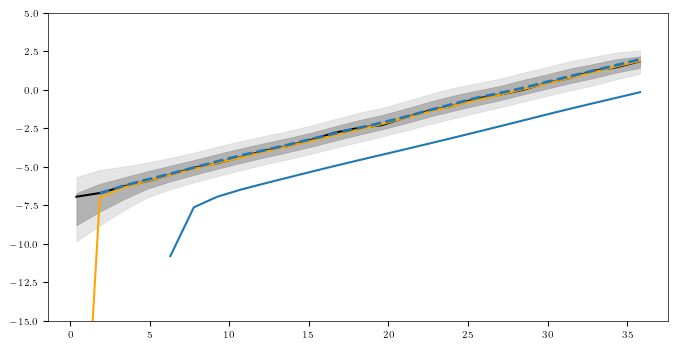

In [4]:
plt.figure(figsize=(8, 4))
logXs = samples.logX().iloc[iterations]
plt.plot(-logXs, logbetas_term_half, color='C0', ls='--', lw=2, zorder=100)
plt.plot(-logXs, logbetas_term, color='C0')
plt.plot(-logXs, logbetas_grad, color='black')
plt.plot(-logXs, logbetas_logL, color='orange')
plt.fill_between(-logXs, logbetas_post_mean - logbetas_post_std, logbetas_post_mean + logbetas_post_std, alpha=.5, color='gray')
plt.fill_between(-logXs, logbetas_post_mean - 2*logbetas_post_std, logbetas_post_mean + 2*logbetas_post_std, alpha=.2, color='gray')
plt.ylim(-15, 5)

# Slab spike Gaussian

In [36]:
name, samples = get_samples('slab_spike')
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]
# samples = samples.iloc[:endpoint_true]

samples['beta_logL'] = get_betas_logL(samples)

In [44]:
Npoints = 25
iterations = make_iterations(endpoint_true, Npoints)
logbetas_term = np.zeros(Npoints)
logbetas_term_half = np.zeros(Npoints)
logbetas_grad = np.zeros(Npoints)
logbetas_post_mean = np.zeros(Npoints)
logbetas_post_std = np.zeros(Npoints)
logbetas_logL = np.log(samples.beta_logL.iloc[iterations])

for i, ndead in enumerate(iterations):
    points = points_at_iteration(samples, ndead)
    logbetas_term[i] = np.log(get_beta_end(points, ndead, epsilon=1e-3))
    logbetas_term_half[i] = np.log(get_beta_end(points, ndead, epsilon=0.5))
    logbetas_grad[i] = get_logbeta_grad(points, ndead)
    logbetas_post_mean[i], logbetas_post_std[i] = get_logbeta_post(points, ndead)
    print('\r', f'Iteration {ndead}/{iterations[-1]}', end='')

/tmp/ipykernel_255917/815502838.py:11: RuntimeWarning: divide by zero encountered in log
  logbetas_term[i] = np.log(get_beta_end(points, ndead, epsilon=1e-3))


 Iteration 6331/6331

(-8.0, 8.0)

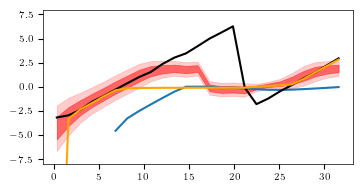

In [45]:
logXs = samples.logX().iloc[iterations]
plt.plot(-logXs, logbetas_term, color='C0')
plt.plot(-logXs, logbetas_grad, color='black')
plt.plot(-logXs, logbetas_logL, color='orange')
plt.fill_between(-logXs, logbetas_post_mean - logbetas_post_std, logbetas_post_mean + logbetas_post_std, alpha=.5, color='red')
plt.fill_between(-logXs, logbetas_post_mean - 2*logbetas_post_std, logbetas_post_mean + 2*logbetas_post_std, alpha=.2, color='red')
plt.ylim(-8, 8)

In [ ]:
logXs = samples.logX().iloc[iterations]
ax.plot(-logXs, logbetas_term, color='C0')
ax.plot(-logXs, logbetas_grad, color='black')
ax.plot(-logXs, logbetas_logL, color='orange')
ax.fill_between(-logXs, logbetas_post_mean - logbetas_post_std, logbetas_post_mean + logbetas_post_std, alpha=.5, color='red')
ax.fill_between(-logXs, logbetas_post_mean - 2*logbetas_post_std, logbetas_post_mean + 2*logbetas_post_std, alpha=.2, color='red')

# Plot results

/tmp/ipykernel_255917/570574425.py:20: RuntimeWarning: divide by zero encountered in log
  logbetas_term[i] = np.log(get_beta_end(points, ndead, epsilon=1e-3))


 Iteration 17925/17925

/tmp/ipykernel_255917/570574425.py:20: RuntimeWarning: divide by zero encountered in log
  logbetas_term[i] = np.log(get_beta_end(points, ndead, epsilon=1e-3))


 Iteration 6331/6331

Text(0.5, 1.0, 'Slab-spike Gaussian')

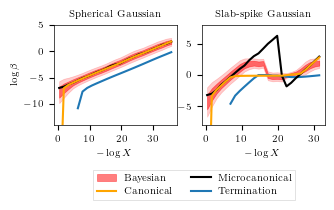

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(3.5, 1.3))

for chain, ax in zip(['gauss_8', 'slab_spike'], axs):
    name, samples = get_samples(chain)
    model = EndModel(samples)
    endpoint_true = model.true_endpoint()
    logXf_true = samples.logX().iloc[endpoint_true]
    samples['beta_logL'] = get_betas_logL(samples)

    Npoints = 25
    iterations = make_iterations(endpoint_true, Npoints)
    logbetas_term = np.zeros(Npoints)
    logbetas_grad = np.zeros(Npoints)
    logbetas_post_mean = np.zeros(Npoints)
    logbetas_post_std = np.zeros(Npoints)
    logbetas_logL = np.log(samples.beta_logL.iloc[iterations])

    for i, ndead in enumerate(iterations):
        points = points_at_iteration(samples, ndead)
        logbetas_term[i] = np.log(get_beta_end(points, ndead, epsilon=1e-3))
        logbetas_grad[i] = get_logbeta_grad(points, ndead)
        logbetas_post_mean[i], logbetas_post_std[i] = get_logbeta_post(points, ndead)
        print('\r', f'Iteration {ndead}/{iterations[-1]}', end='')
        
    logXs = samples.logX().iloc[iterations]
    ax.plot(-logXs, logbetas_term, color='C0', label='Termination')
    ax.plot(-logXs, logbetas_grad, color='black', label='Microcanonical')
    ax.plot(-logXs, logbetas_logL, color='orange', label='Canonical')
    ax.fill_between(-logXs, logbetas_post_mean - logbetas_post_std, logbetas_post_mean + logbetas_post_std, alpha=.5, color='red', label='Bayesian')
    ax.fill_between(-logXs, logbetas_post_mean - 2*logbetas_post_std, logbetas_post_mean + 2*logbetas_post_std, alpha=.2, color='red')

for ax in axs:
    ax.set_xlabel(r"$-\log X$")

axs[0].set_ylabel(r'$\log \beta$')    
axs[0].set_ylim(-14, 5)
axs[1].set_ylim(-8, 8)

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[::-1], labels[::-1], ncol=2, bbox_to_anchor=(2, -0.4), fontsize=7)
axs[0].set_title('Spherical Gaussian', fontsize=7)
axs[1].set_title('Slab-spike Gaussian', fontsize=7)